<a href="https://colab.research.google.com/github/mancuso68/projetos/blob/main/benford.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lei de Benford
Por: `Luciano Mancuso da Cunha` - *luciano.mancuso@gmail.com*

---
Nesse estudo serão testados vários datasets diferentes para validação seguindo os princípios da **Lei de Benford**.

A **Lei de Benford**, também conhecida com Lei do Primeiro Dígito, consiste em retirar o primeiro dígito de uma sequência númérica e separá-los conforme seu valor, variando de 1 até 9. Depois disso, é feito um cálculo percentual da quantidade de cada dígito em relação ao volume total da amostra.

Para validação dos dados, o percentual de ocorrência de cada dígito deve estar próximo do seguinte cálculo:

**log10(1+1/d)**, onde **d** é o primeiro dígito.

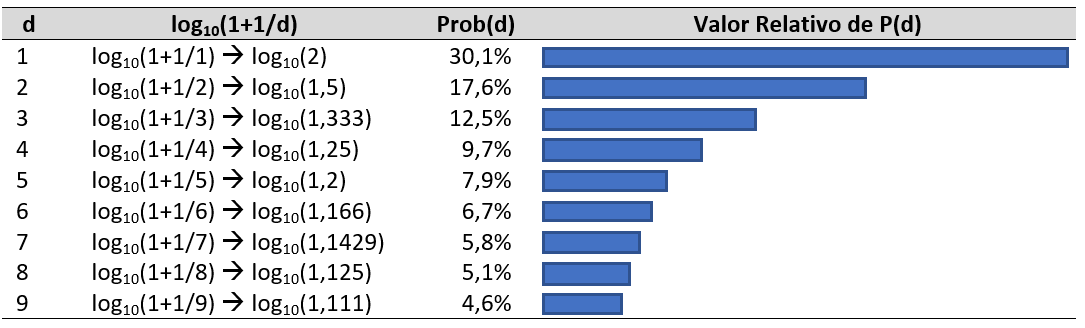


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

##Base de dados do AirBnb
O Airbnb possui uma base de dados compartilhada com informações das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esse estudo vou utilizar o arquivo *listing.csv*

Recentemente fiz uma análise simples de uma base de dados do AirBnb para a cidade de Sydney. Aqui vou buscar também a base de dados do Rio de Janeiro, Tokyo, Londres e Cidade do Cabo.

O Dataframe possui 16 colunas conforme abaixo:

**Dicionário das variáveis**

* `id` - Número de Id, identificação única do Imóvel. Provavelmente Chave Primária de uma tabela
* `name` - Nome da propriedade
* `host_id` - Número de Id do priprietário
* `host_name` - Nome do proprietário
* `neighbourhood_group` - Esse campo não será usado no trabalho. Está preenchido com valores nulos
* `neighbourhood` - Barro onde o imóvel está localizado
* `latitude` - Coordenada GPS da latitude do imóvel
* `longitude` - Coordenada GPS de longitude do imóvel
* `room_type`- Tipo de imóvel oferecido para locação
* `price` - Preço de aluguel do imóvel
* `minimum_nights` - Quantidade mínima de diárias para locação
* `number_of_reviews` - Número de avaliações
* `last_review`- Data da última avaliação
* `reviews_per_month`- Avaliações por mês
* `calculated_host_listings_count` - Contágem de Imóveis do mesmo proprietário
* `availability_365`- dias diaponiveis no interválo de um ano

Para esse estudo vou utilizar apenas uma coluna. É preciso consider uma coluna que contenha valores aleatórios sem definição de um intervalo de dados. Para esse caso, considerei a coluna de preço (*price*)

##Dataframe de Análise
O Dataframe da análise para cada país deverá conter 4 colunas:

* `primeiro digito`- Primeiro dígito (1 até 9)
* `benford`- Valores percentuais da Lei de Benford calculados conforme a fórmula **log10(1+1/d)**
* `total do digito` - quantidade de vezes que o primeiro dígito aparece no Dataframe original
* `percentual do digito` - Percentual que o dígito representa no total da amostra

Inicialmente montei uma função que carrega o dados do AirBnb e monta os Dataframes de Análise.

In [ ]:
#Montando uma função para criar um dataframe com os dados resumidos
def monta_benford(path):

  #criando dicionário com dados já conhecidos de benford
  benford_dict={
      "primeiro digito":[1,2,3,4,5,6,7,8,9],
      "benford":[30.1,17.6,12.5,9.7,7.9,6.7,5.8,5.1,4.6]
  }

  #Criando o Dataframe de análise a partir do Dicionário
  benford_res=pd.DataFrame(benford_dict)

  #carregando o Dataframe do AirBnb conforme caminho indicado
  data=pd.read_csv(path)

  # carregando total de registros do Dataframe na variável totreg
  totreg = data.shape[0]

  #Zerando as variáveis contadoras dos dígitos
  d1, d2, d3, d4, d5, d6, d7, d8, d9 = 0,0,0,0,0,0,0,0,0

  #For para varrer o campo price de todo Dataset o fazer a contagem dos dígitos
  for i in range(totreg):
    dig=str(data['price'][i])
    p_dig=dig[0]
    if p_dig=='1':
      d1+=1
    elif p_dig=='2':
      d2+=1
    elif p_dig=='3':
      d3+=1
    elif p_dig=='4':
      d4+=1
    elif p_dig=='5':
      d5+=1
    elif p_dig=='6':
      d6+=1
    elif p_dig=='7':
      d7+=1
    elif p_dig=='8':
      d8+=1
    elif p_dig=='9':
      d9+=1

  #Calculando o total de todos os dígitos
  dtot=d1+d2+d3+d4+d5+d6+d7+d8+d9

  #Inserindo as colunas totdigito e percdigito
  benford_res['total do digito']=[d1,d2,d3,d4,d5,d6,d7,d8,d9]
  benford_res['percentual do digito']=[d1/dtot*100,d2/dtot*100,d3/dtot*100,d4/dtot*100,d5/dtot*100,d6/dtot*100,d7/dtot*100,d8/dtot*100,d9/dtot*100]

  return benford_res

In [ ]:
#Criando os Dataframes de análise para cada cidade
df_cabo = monta_benford("http://data.insideairbnb.com/south-africa/wc/cape-town/2021-01-30/visualisations/listings.csv")
df_rio = monta_benford("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2021-01-26/visualisations/listings.csv")
df_londres = monta_benford("http://data.insideairbnb.com/united-kingdom/england/london/2021-02-09/visualisations/listings.csv")
df_sydney = monta_benford("http://data.insideairbnb.com/australia/nsw/sydney/2021-02-08/visualisations/listings.csv")
df_tokyo = monta_benford("http://data.insideairbnb.com/japan/kant%C5%8D/tokyo/2021-01-27/visualisations/listings.csv")

Após criar os Dataframes, passei para a verificação das 9 entradas de cada um deles.

In [ ]:
df_cabo.head(9)

,primeiro digito,benford,total do digito,percentual do digito
0,1,30.1,5456,28.513196
1,2,17.6,2618,13.681735
2,3,12.5,1963,10.258688
3,4,9.7,1797,9.391168
4,5,7.9,1760,9.197805
5,6,6.7,1588,8.298929
6,7,5.8,1419,7.415730
7,8,5.1,1324,6.919258
8,9,4.6,1210,6.323491


In [ ]:
df_rio.head(9)

,primeiro digito,benford,total do digito,percentual do digito
0,1,30.1,8596,32.936128
1,2,17.6,5252,20.123376
2,3,12.5,3210,12.299322
3,4,9.7,2127,8.149738
4,5,7.9,2047,7.843212
5,6,6.7,1411,5.406337
6,7,5.8,1134,4.344994
7,8,5.1,1319,5.053833
8,9,4.6,1003,3.843059


In [ ]:
df_londres.head(9)

,primeiro digito,benford,total do digito,percentual do digito
0,1,30.1,19527,25.522154
1,2,17.6,11177,14.608548
2,3,12.5,10124,13.232257
3,4,9.7,8046,10.516272
4,5,7.9,6764,8.840674
5,6,6.7,5803,7.584629
6,7,5.8,5542,7.243498
7,8,5.1,4929,6.442295
8,9,4.6,4598,6.009672


In [ ]:
df_sydney.head(9)

,primeiro digito,benford,total do digito,percentual do digito
0,1,30.1,11519,34.252156
1,2,17.6,4536,13.487957
2,3,12.5,3020,8.980077
3,4,9.7,2701,8.031519
4,5,7.9,2911,8.655962
5,6,6.7,2439,7.252453
6,7,5.8,2302,6.845079
7,8,5.1,2198,6.535831
8,9,4.6,2004,5.958965


In [ ]:
df_tokyo.head(9)

,primeiro digito,benford,total do digito,percentual do digito
0,1,30.1,2806,24.639972
1,2,17.6,1562,13.716192
2,3,12.5,1774,15.577801
3,4,9.7,1336,11.731647
4,5,7.9,1227,10.774499
5,6,6.7,907,7.964524
6,7,5.8,651,5.716544
7,8,5.1,639,5.611170
8,9,4.6,486,4.267650


###Gráfico e Correlação dos dados

O percentual de participação de cada dígito não é necessariamente igual ao percentual calculado a partir da fórmula de Benford. Porém é possível verificar que existe uma participação muito maior do dígito 1 em relação ao dígito 2 e assim por diante, ficando os últimos números com participações próximas. 

Nessa etapa vou plotar um gráfico comparando o resultado do percentual de cada dígito em relação ao percentual da Lei de Benford. Para melhorar a avaliação, apresentarei no meio do gráfico a Correlação de Pearson entre esses dois campos.

In [ ]:
#criando uma função para plotar os gráficos
def monta_grafico(data,cidade):

  #Calculando a correlação de Pearson e montando o texto do meio do gráfico
  corp = "Correlação = {0:4.4f}".format(data['benford'].corr(data['percentual do digito']))

  #Montando as variáveis do gráfico
  fig, ax = plt.subplots(figsize=(8,5))

  #Plotando o gráfico de linha com o percentual do dígito
  data['percentual do digito'].plot(kind='line', linewidth=2, marker='s', ax=ax)
  #plotando o gráfico de barras com o percentual da Lei de Benford
  data.plot(x="primeiro digito", y="benford", kind="bar", color='gray', ax=ax)

  #inserindo título, legenda, label dos eixos e texto com correlação
  ax.set_title(cidade)
  ax.legend(loc='best')
  ax.set_xlabel("Primeiros dígitos")
  ax.set_ylabel("Percentual de participação")
  ax.text(3,20,corp, fontsize=14)

  #Plotando o gráfico completo
  plt.tight_layout()

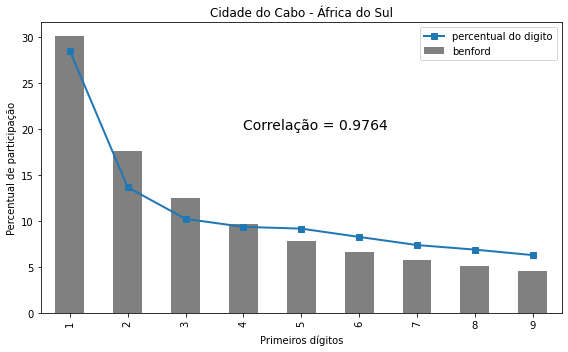

In [ ]:
monta_grafico(df_cabo,"Cidade do Cabo - África do Sul")

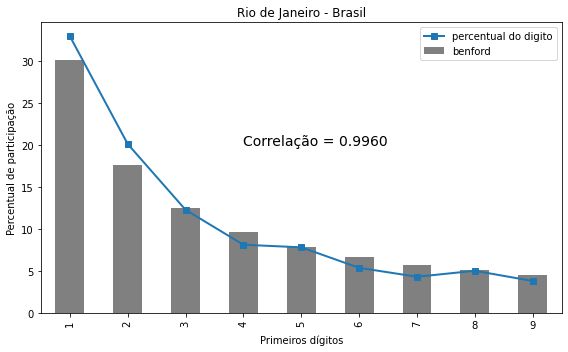

In [ ]:
monta_grafico(df_rio,"Rio de Janeiro - Brasil")

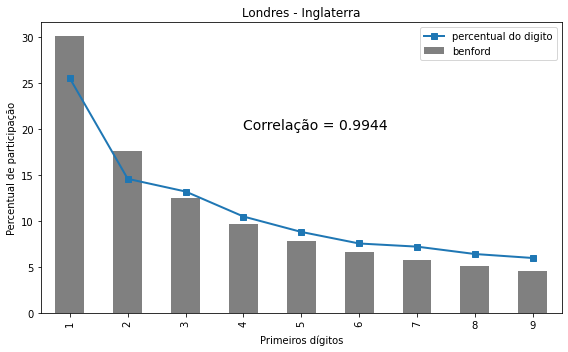

In [ ]:
monta_grafico(df_londres,"Londres - Inglaterra")

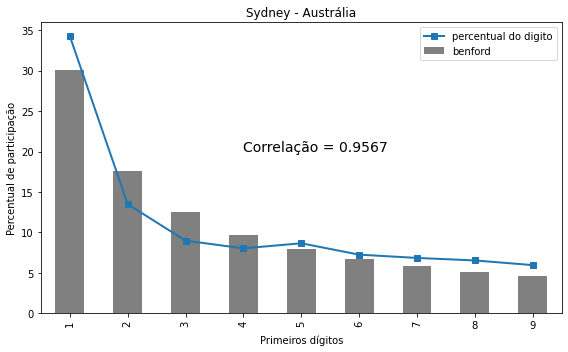

In [ ]:
monta_grafico(df_sydney,"Sydney - Austrália")

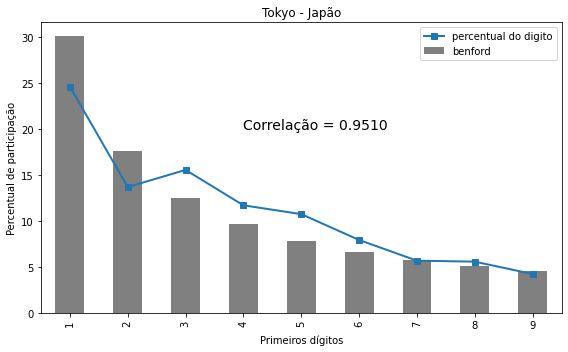

In [ ]:
monta_grafico(df_tokyo,"Tokyo - Japão")

##Análise

Apesar dos percentuais de cada cidade não ficarem iguais aos da Lei de Benford, a correlação entre eles é bem próxima de 1, que seria uma correlação forte.

Partindo dessa informação, acredita-se que os dados apresentados pela ArirBnb não são dados manipulados e representam uma realidade.